In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 92.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 107.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 21.0 MB/s eta 0:00:00


In [ ]:
import torch
from tqdm.notebook import tqdm

from transformers import BertTokenizer
from torch.utils.data import TensorDataset
import pandas as pd
from transformers import BertForSequenceClassification
import numpy as np

ModuleNotFoundError: ignored

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Research ISB - Data Science for Product Managers/kidsInMindSubtitles2004.csv")

In [ ]:
profane_word_list=[]
with open('/content/profane_words_google.txt','r') as file:
  
    # reading each line   
    for line in file:
      profane_word_list.append(line)
  
        # reading each word       


In [ ]:
profane_word_list

['2 girls 1 cup\n',
 '2g1c\n',
 '4r5e\n',
 '5h1t\n',
 '5hit\n',
 'a55\n',
 'a_s_s\n',
 'acrotomophilia\n',
 'alabama hot pocket\n',
 'alaskan pipeline\n',
 'anal\n',
 'anilingus\n',
 'anus\n',
 'apeshit\n',
 'ar5e\n',
 'arrse\n',
 'arse\n',
 'arsehole\n',
 'ass\n',
 'ass-fucker\n',
 'ass-hat\n',
 'ass-pirate\n',
 'assbag\n',
 'assbandit\n',
 'assbanger\n',
 'assbite\n',
 'assclown\n',
 'asscock\n',
 'asscracker\n',
 'asses\n',
 'assface\n',
 'assfucker\n',
 'assfukka\n',
 'assgoblin\n',
 'asshat\n',
 'asshead\n',
 'asshole\n',
 'assholes\n',
 'asshopper\n',
 'assjacker\n',
 'asslick\n',
 'asslicker\n',
 'assmonkey\n',
 'assmunch\n',
 'assmuncher\n',
 'asspirate\n',
 'assshole\n',
 'asssucker\n',
 'asswad\n',
 'asswhole\n',
 'asswipe\n',
 'auto erotic\n',
 'autoerotic\n',
 'b!tch\n',
 'b00bs\n',
 'b17ch\n',
 'b1tch\n',
 'babeland\n',
 'baby batter\n',
 'baby juice\n',
 'ball gag\n',
 'ball gravy\n',
 'ball kicking\n',
 'ball licking\n',
 'ball sack\n',
 'ball sucking\n',
 'ballbag\n',
 

In [ ]:
words=[]
for sub in profane_word_list:
    words.append(sub.replace("\n", ""))

In [ ]:
words

['2 girls 1 cup',
 '2g1c',
 '4r5e',
 '5h1t',
 '5hit',
 'a55',
 'a_s_s',
 'acrotomophilia',
 'alabama hot pocket',
 'alaskan pipeline',
 'anal',
 'anilingus',
 'anus',
 'apeshit',
 'ar5e',
 'arrse',
 'arse',
 'arsehole',
 'ass',
 'ass-fucker',
 'ass-hat',
 'ass-pirate',
 'assbag',
 'assbandit',
 'assbanger',
 'assbite',
 'assclown',
 'asscock',
 'asscracker',
 'asses',
 'assface',
 'assfucker',
 'assfukka',
 'assgoblin',
 'asshat',
 'asshead',
 'asshole',
 'assholes',
 'asshopper',
 'assjacker',
 'asslick',
 'asslicker',
 'assmonkey',
 'assmunch',
 'assmuncher',
 'asspirate',
 'assshole',
 'asssucker',
 'asswad',
 'asswhole',
 'asswipe',
 'auto erotic',
 'autoerotic',
 'b!tch',
 'b00bs',
 'b17ch',
 'b1tch',
 'babeland',
 'baby batter',
 'baby juice',
 'ball gag',
 'ball gravy',
 'ball kicking',
 'ball licking',
 'ball sack',
 'ball sucking',
 'ballbag',
 'balls',
 'ballsack',
 'bampot',
 'bangbros',
 'bareback',
 'barely legal',
 'barenaked',
 'bastard',
 'bastardo',
 'bastinado',
 'bbw

In [ ]:
# import nltk
# nltk.download('punkt')
# count_profane_words=[]
# for text in df['subtitles']:
#   count=0
#   tokenized = nltk.word_tokenize(text)
#   for word in text:
#     if word in words:
#       count=count+1
#   count_profane_words.append(count)
count_profane_words=[]
for text in df['subtitles']:
  count=0
  for word in words:
    if word in text:
      count=count+1
  count_profane_words.append(count)




In [ ]:
count_profane_words

[22,
 46,
 19,
 35,
 23,
 22,
 25,
 16,
 30,
 24,
 46,
 17,
 29,
 15,
 27,
 18,
 9,
 9,
 4,
 33,
 3,
 10,
 36,
 24,
 34,
 19,
 27,
 12,
 25,
 52,
 10,
 26,
 27,
 21,
 21,
 1,
 32,
 30,
 13,
 26,
 17,
 11,
 18,
 21,
 40,
 59,
 7,
 33,
 17,
 43,
 23,
 34,
 8,
 15,
 6,
 0,
 4,
 4,
 38,
 16,
 11,
 24,
 33,
 19,
 61,
 27,
 61,
 20,
 25,
 41,
 72,
 37,
 15,
 20,
 14,
 24,
 16,
 39,
 47,
 8,
 37,
 69,
 21,
 44,
 27,
 15,
 15,
 29,
 18,
 35,
 25,
 10,
 29,
 24,
 23,
 17,
 18,
 35,
 24,
 50,
 10,
 22,
 20,
 34,
 33,
 16,
 22,
 23,
 24,
 17,
 38,
 4,
 54,
 18,
 0,
 35,
 35,
 15,
 11,
 25,
 27,
 24,
 12,
 10,
 35,
 38,
 10,
 43,
 8,
 8,
 38,
 15,
 11,
 48,
 57,
 36,
 35,
 51,
 69,
 26,
 26,
 16,
 24,
 58,
 42,
 24,
 17,
 8,
 12,
 34,
 46,
 18,
 33,
 20,
 48,
 25,
 56,
 13,
 23,
 17,
 23,
 13,
 25,
 26,
 8,
 23,
 27,
 24,
 37,
 14,
 14,
 33,
 28,
 13,
 23,
 54,
 15,
 11,
 3,
 32,
 36,
 19,
 7,
 14,
 39,
 11,
 5,
 18,
 35,
 4,
 18,
 26,
 3,
 19,
 48,
 26,
 13,
 7,
 43,
 30,
 15,
 21,
 19,
 34,
 17,

In [ ]:
df["num_profane_words"]=count_profane_words

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import _stop_words
 
corpus = df['subtitles'].values
 
 
#vectorizer = TfidfVectorizer(stop_words=None)
vectorizer = TfidfVectorizer()
 
X = vectorizer.fit_transform(df['subtitles'].values)

In [ ]:
x = df[['subtitles', 'num_profane_words']]

In [ ]:
y=df['Language']

In [ ]:
X=vectorizer.fit_transform(x)

In [ ]:
print(x)

                                              subtitles  num_profane_words
0     Advertise your product or brand here\ncontact ...                 22
1     So? Tell me about last night.Are you kidding m...                 46
2     Search the thicket.Oh, leg! You're looking\nfo...                 19
3     -== [ www.OpenSubtitles.com ] ==-<i>I always k...                 35
4     in the alley and followed it down.\nFound it j...                 23
...                                                 ...                ...
1999  [<b>Subtitles Added by Neeraj(neeraj6488@gmail...                 59
2000  - Honey... did you hear that?\n- Hear what?Bar...                 13
2001  Oh, man. I can't get over\nhow different we lo...                 22
2002  Come this way!Men wounded in battle we can dea...                 30
2003  <i>It's 9am. Temperature is 72 degrees...</i><...                 20

[2004 rows x 2 columns]


In [ ]:
X=np.array(df.num_profane_words.astype(int)).reshape(-1,1)

In [ ]:
y=list(df.Language.astype(int))

In [ ]:
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X,y)

DecisionTreeRegressor(random_state=0)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
x = df['subtitles']
y = df['Language']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [ ]:
mlr = LinearRegression()  
mlr.fit(vectorizer.fit_transform(x_train), y_train)

LinearRegression()

In [ ]:
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  -0.30405471738709267
Coefficients:


In [ ]:
y_pred = regressor.predict([[7]])
  
# print the predicted price
print("Language score: % d\n"% y_pred)

Language score:  4



In [ ]:
import matplotlib.pyplot as plt

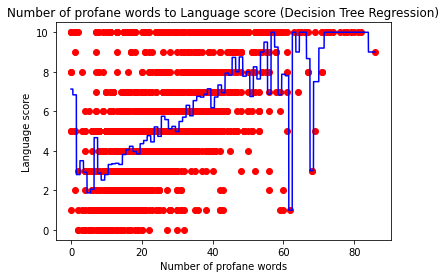

In [ ]:
X_grid = np.arange(min(X), max(X), 0.01)
  
# reshape for reshaping the data into 
# a len(X_grid)*1 array, i.e. to make
# a column out of the X_grid values
X_grid = X_grid.reshape((len(X_grid), 1)) 
  
# scatter plot for original data
plt.scatter(X, y, color = 'red')
  
# plot predicted data
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue') 
  
# specify title
plt.title('Number of profane words to Language score (Decision Tree Regression)') 
  
# specify X axis label
plt.xlabel('Number of profane words')
  
# specify Y axis label
plt.ylabel('Language score')
  
# show the plot
plt.show()

In [ ]:
from sklearn.tree import export_graphviz 
  
# export the decision tree to a tree.dot file
# for visualizing the plot easily anywhere
export_graphviz(regressor, out_file ='tree.dot',
               feature_names =['Language score'])

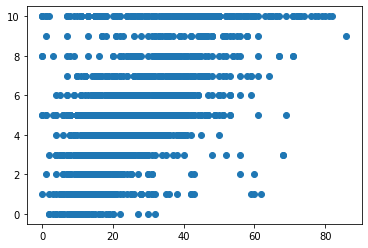

In [ ]:
plt.scatter(X, y)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model, metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=1)
  
# create linear regression object
reg = linear_model.LinearRegression()
  
# train the model using the training sets
reg.fit(X_train, y_train)
  
# regression coefficients
print('Coefficients: ', reg.coef_)
  
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))

Coefficients:  [0.10552946]
Variance score: 0.34819701091960664


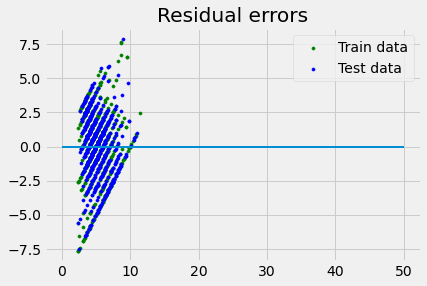

In [ ]:
plt.style.use('fivethirtyeight')
  
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
  
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
  
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
  
## plotting legend
plt.legend(loc = 'upper right')
  
## plot title
plt.title("Residual errors")
  
## method call for showing the plot
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
modelLogistic = LogisticRegression()
modelLogistic.fit(X_train,y_train)
#print the regression coefficients

print("The intercept b0= ", modelLogistic.intercept_)

print("The coefficient b1= ", modelLogistic.coef_)

The intercept b0=  [ 2.0373657   2.27012338  1.86694185  1.40505998  0.47937989  1.49399836
 -0.31493327 -1.53203919 -2.73951262 -2.95374434 -2.01263973]
The coefficient b1=  [[-0.16420554]
 [-0.09163526]
 [-0.08390239]
 [-0.03459661]
 [ 0.00992654]
 [ 0.00218847]
 [ 0.03512326]
 [ 0.06391486]
 [ 0.08678539]
 [ 0.08414604]
 [ 0.09225525]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_pred= modelLogistic.predict(X_test)

In [ ]:
import seaborn as sns

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.25


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
 
# Text Pre-processing libraries
import nltk
import string
import warnings
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
 
# Tensorflow imports to build the model.
import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


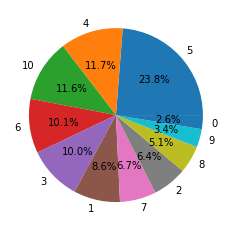

In [ ]:
plt.pie(df['Language'].value_counts().values,
        labels = df['Language'].value_counts().index,
        autopct='%1.1f%%')
plt.show()

In [ ]:
!pip install detoxify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from detoxify import Detoxify
results = Detoxify('original').predict(df['subtitles'][0])

In [ ]:
print(results)

{'toxicity': 0.64447117, 'severe_toxicity': 0.003384288, 'obscene': 0.11197078, 'threat': 0.0033403705, 'insult': 0.19281714, 'identity_attack': 0.034498047}


In [ ]:
toxicity=[]
severe_toxicity=[]
obscene=[]
threat=[]
insult=[]
identity_attack=[]

In [ ]:
df=df.head(200)

In [ ]:
for idx in df.index:
  results = Detoxify('original').predict(df['subtitles'][idx])
  toxicity.append(results['toxicity'])
  severe_toxicity.append(results['severe_toxicity'])
  obscene.append(results['obscene'])
  threat.append(results['threat'])
  insult.append(results['insult'])
  identity_attack.append(results['identity_attack'])



In [ ]:
print(len(toxicity))

200


In [ ]:
print(results)

{'toxicity': 0.7480432, 'severe_toxicity': 0.0058508758, 'obscene': 0.6173635, 'threat': 0.001991844, 'insult': 0.17194569, 'identity_attack': 0.0050898334}


In [ ]:
df['toxicity']=toxicity
df['severe_toxicity']=severe_toxicity
df['obscene']=obscene
df['threat']=threat
df['insult']=insult
df['identity_attack']=identity_attack

In [ ]:
X = df[['toxicity', 'severe_toxicity','obscene','threat','insult','identity_attack']]
y=df.Language

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.30


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model, metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=1)
  
# create linear regression object
reg = linear_model.LinearRegression()
  
# train the model using the training sets
reg.fit(X_train, y_train)
  
# regression coefficients
print('Coefficients: ', reg.coef_)
  
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))

Coefficients:  [-1.9316634  1.7920594  7.34458   -5.2125196 -1.8084581  4.694869 ]
Variance score: 0.27879451323093074


In [ ]:
from matplotlib import pyplot as plt 

import seaborn as sns 

In [ ]:
y_pred=reg.predict(X_test)
y_pred


array([3.9619687, 3.6181047, 4.11586  , 4.431117 , 7.2612696, 4.389923 ,
       5.353864 , 6.2372503, 6.1880608, 7.7519283, 5.0318565, 4.4265485,
       4.267786 , 5.2523637, 7.9306297, 4.4376836, 4.2921658, 4.4029675,
       6.0795445, 4.374376 , 4.5208135, 4.4097457, 5.156247 , 5.2906246,
       4.2421017, 3.2225251, 4.31617  , 4.361842 , 4.2487164, 3.268838 ,
       4.4443235, 5.643705 , 6.405105 , 4.0616736, 4.4354887, 4.279963 ,
       4.4385095, 4.479899 , 4.718291 , 7.229883 , 4.737411 , 7.405011 ,
       4.100864 , 4.920782 , 4.3770857, 4.205404 , 4.117066 , 6.216525 ,
       3.7295866, 7.326079 , 4.260569 , 3.813464 , 5.8434486, 4.1204925,
       4.427187 , 4.376534 , 4.399599 , 3.6854527, 7.2491655, 7.9371376,
       7.0696654, 6.0320716, 7.8298664, 4.359146 , 4.333393 , 4.306644 ,
       3.936019 , 6.0130014, 4.2462916, 8.096103 , 4.273811 , 6.7590923,
       3.6783667, 3.4544325, 3.7192407, 4.093558 , 4.4229674, 4.408151 ,
       4.3315506, 4.309178 ], dtype=float32)

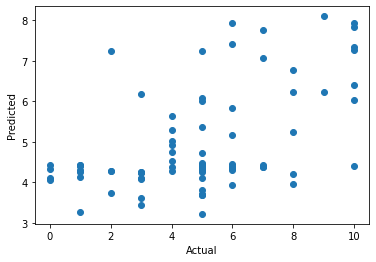

In [ ]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
Accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 27.88


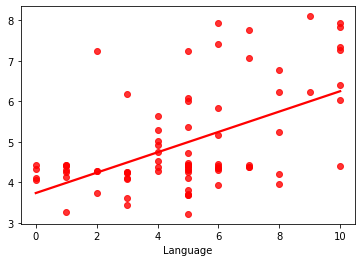

In [ ]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [ ]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})

In [ ]:
pred_df

,Actual Value,Predicted Value,Difference
58,8,3.961969,4.038031
40,3,3.618105,-0.618105
34,3,4.115860,-1.115860
102,7,4.431117,2.568883
184,10,7.261270,2.738730
...,...,...,...
113,3,4.093558,-1.093558
12,5,4.422967,0.577033
117,10,4.408151,5.591849
93,5,4.331551,0.668449
